# credit card fraud detection

start by importing libraries needed

In [44]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import self_utils as su
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler 
import sys
!{sys.executable} -m pip install xgboost
from sklearn.metrics import accuracy_score, confusion_matrix
%matplotlib inline




'c:\Users\Gauri' is not recognized as an internal or external command,
operable program or batch file.


importing dataset 

In [46]:
data = pd.read_csv("creditcard.csv") 
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


performing exploratory data analysis

In [47]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [48]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


checking data distribution

<Axes: xlabel='Class', ylabel='count'>

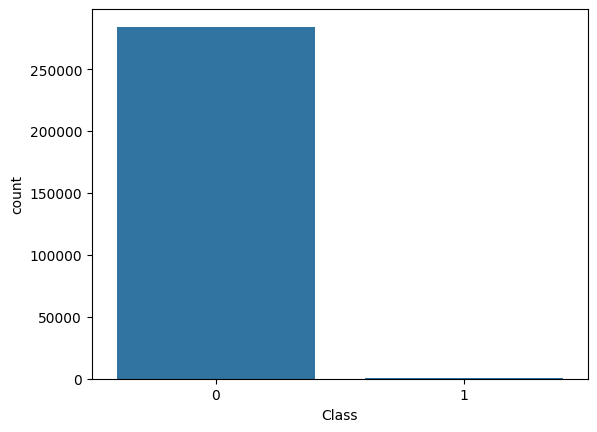

In [49]:
sns.countplot(x='Class', data=data)

From the above plot, it can be seen that the dataset is highly unbalanced. Now we'll see what is the impact of `Amount` and `Time` on `Class`

<Axes: xlabel='Time', ylabel='Class'>

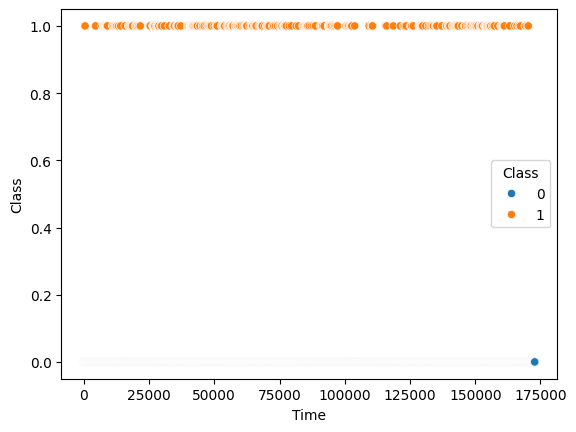

In [51]:
sns.scatterplot(x="Time", y="Class", hue="Class", data=data)

<Axes: xlabel='Amount', ylabel='Class'>

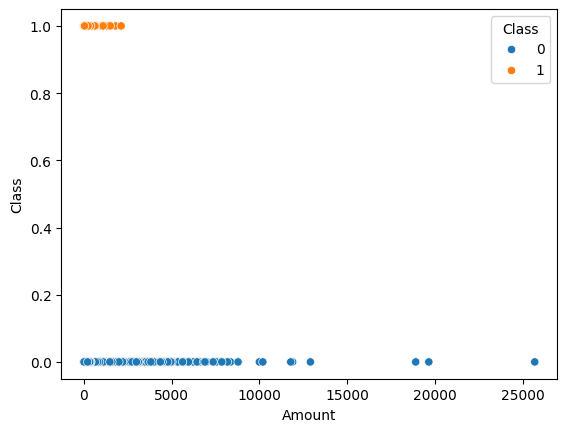

In [8]:
sns.scatterplot(data=data, x="Amount", y="Class", hue="Class")

- Based on both scatter plots, it appears that the "Amount" variable is a more significant predictor of the "Class" variable compared to "Time." The clear separation between the two classes based on "Amount" suggests that it is a strong indicator of class membership. 

- Now, we'll drop the "Time" column due to it's lack of strong correlation with "Class.".

In [9]:
data=data.drop(['Time'],axis=1)

In [10]:
#scaling `Amount`for further analysis

data['Amount'] = StandardScaler().fit_transform(np.array(data['Amount']).reshape(-1,1))
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0


In [11]:
data['Class'].value_counts()  #here 1 denotes the number of fraud transactions

Class
0    284315
1       492
Name: count, dtype: int64

Splitting dataset for training

In [12]:
X = data.drop("Class", axis=1)
y = data["Class"]

In [13]:
# split into 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 7)    


looking at skewness of data

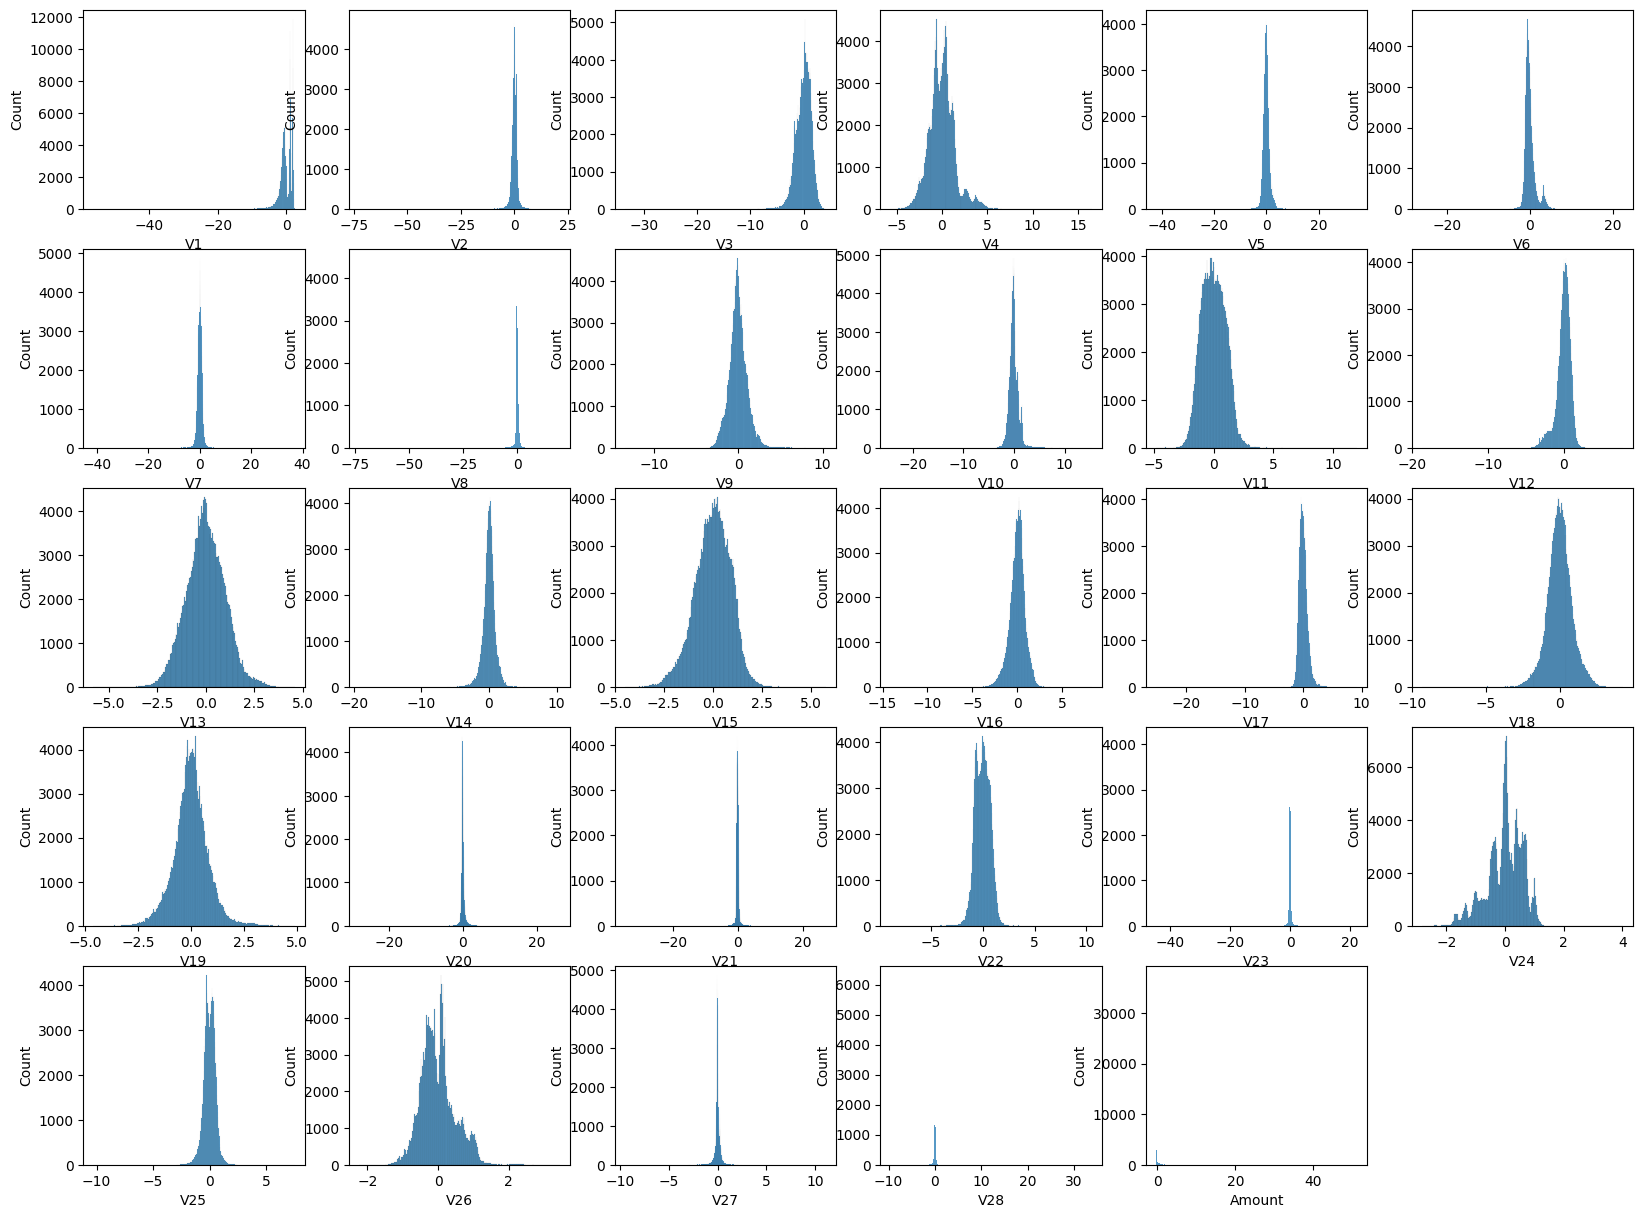

In [14]:
columns = list(data.columns.values)
columns.remove("Class")
col = X_train.columns
plt.figure(figsize=(20,15))
n=1
for i in col:
    plt.subplot(5,6, n)
    sns.histplot(data = X_train[i])
    n+=1
plt.show()

Applying `SMOTE` over sampling technique to balance the data

In [15]:
%pip install imbalanced-learn
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
from imblearn.over_sampling import SMOTE

In [17]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'), y_train)
print("Before applying smote : ", Counter(y_train))
print("After applying smote : ", Counter(y_train_smote))


Before applying smote :  Counter({0: 213239, 1: 366})
After applying smote :  Counter({0: 213239, 1: 213239})


# Testing different models on the dataset 

1.a LOGISTIC REGRESSION- before applying `SMOTE`

In [18]:
model_bs_1 = LogisticRegression(solver='lbfgs', max_iter=1000)
model_bs_1.fit(X_train, y_train)
y_pred_bs_1 = model_bs_1.predict(X_test)
acc_bs_1 = accuracy_score(y_test, y_pred_bs_1)
acc_bs_1

0.9990590151962023

confusion matrix

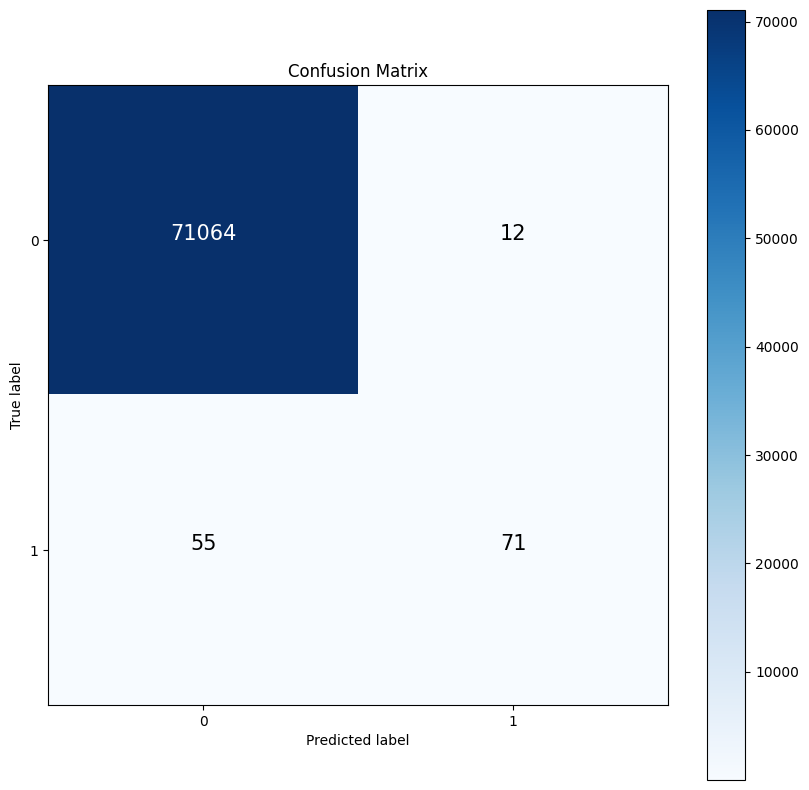

In [19]:
su.make_confusion_matrix(y_test, y_pred_bs_1)

Accuracy, recall and other metrics of the model

In [20]:
res1a = su.calculate_results(y_test, y_pred_bs_1)
res1a

{'accuracy': 99.90590151962023,
 'precision': np.float64(0.9989721691336407),
 'recall': np.float64(0.9990590151962023),
 'f1': np.float64(0.9989623576017113)}

1.b Logistic Regression- after applying `SMOTE`

In [21]:
model_as_1 = LogisticRegression(solver='lbfgs', max_iter=1000)
model_as_1.fit(X_train_smote, y_train_smote)
y_pred_as_1 = model_as_1.predict(X_test)
acc_as_1 = accuracy_score(y_test, y_pred_as_1)
acc_as_1

0.976138310721609

confusion matrix

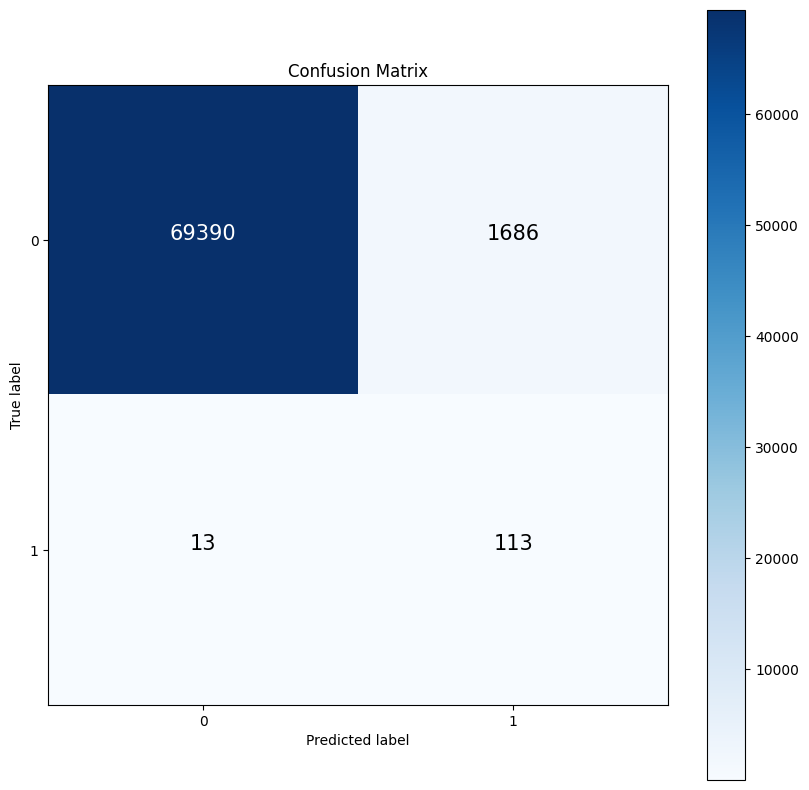

In [22]:
su.make_confusion_matrix(y_test, y_pred_as_1)

Accuracy, recall and other metrics of the model

In [23]:
res1b = su.calculate_results(y_test, y_pred_as_1)
res1b

{'accuracy': 97.61383107216089,
 'precision': np.float64(0.9981545606059716),
 'recall': np.float64(0.976138310721609),
 'f1': np.float64(0.9863652118839371)}

2.a Decision tree classifier- before applying `SMOTE`

In [24]:
model_bs_2 = DecisionTreeClassifier(criterion='entropy', max_depth=5)
model_bs_2.fit(X_train, y_train)
y_pred_bs_2 = model_bs_2.predict(X_test)
acc_bs_2 = accuracy_score(y_test, y_pred_bs_2)
acc_bs_2

0.9994382180275835

confusion matrix

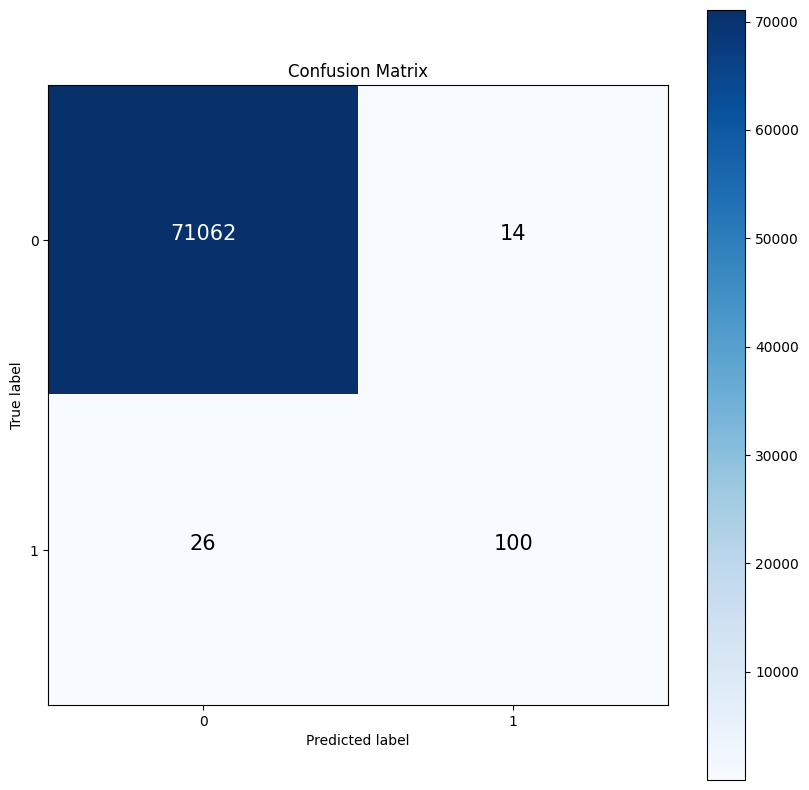

In [25]:
su.make_confusion_matrix(y_test, y_pred_bs_2)

Accuracy, recall and other metrics of the model

In [26]:
res2a = su.calculate_results(y_test, y_pred_bs_2)
res2a

{'accuracy': 99.94382180275835,
 'precision': np.float64(0.9994175824375142),
 'recall': np.float64(0.9994382180275835),
 'f1': np.float64(0.9994241971881562)}

2.b Decision tree classifier- after applying `SMOTE`

In [52]:
model_as_2 = DecisionTreeClassifier(criterion='entropy', max_depth=5)
model_as_2.fit(X_train_smote, y_train_smote)
y_pred_as_2 = model_as_2.predict(X_test)
acc_as_2 = accuracy_score(y_test, y_pred_as_2)
acc_as_2

0.9671778882615657

confusion matrix

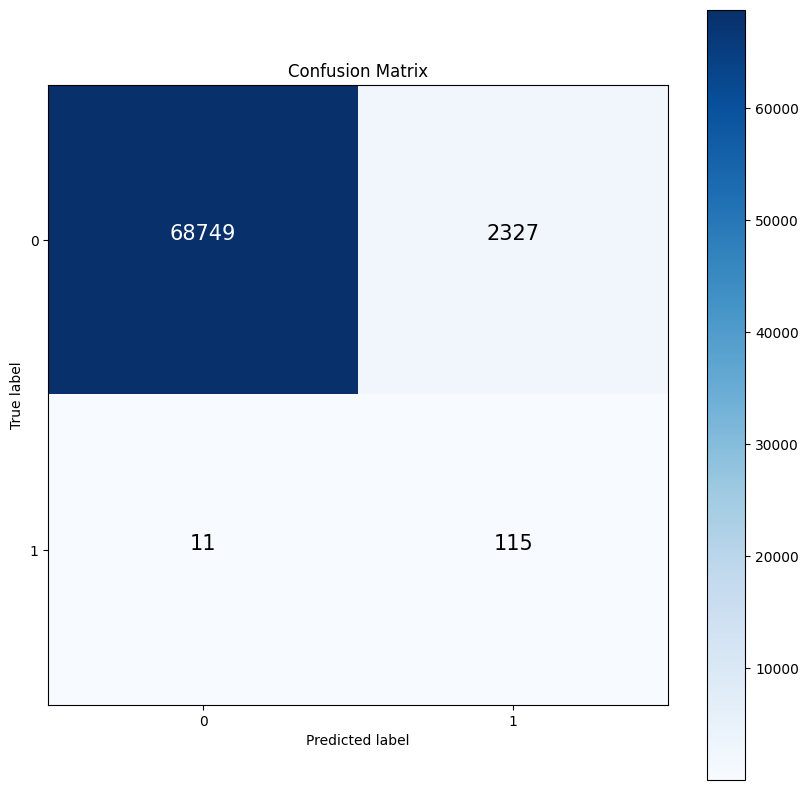

In [28]:
su.make_confusion_matrix(y_test, y_pred_as_2)

Accuracy, recall and other metrics of the model

In [29]:
res2b = su.calculate_results(y_test, y_pred_as_2)
res2b

{'accuracy': 96.71638437122553,
 'precision': np.float64(0.9981540287467411),
 'recall': np.float64(0.9671638437122553),
 'f1': np.float64(0.9816988815815846)}

3.a K Nearest Neighbor Classifier- before applying `SMOTE`

In [53]:
model_bs_3 = KNeighborsClassifier(n_neighbors=3)
model_bs_3.fit(X_train, y_train)
y_pred_bs_3 = model_bs_3.predict(X_test)
acc_bs_3 = accuracy_score(y_test, y_pred_bs_3)
acc_bs_3

0.9995646189713772

confusion matrix

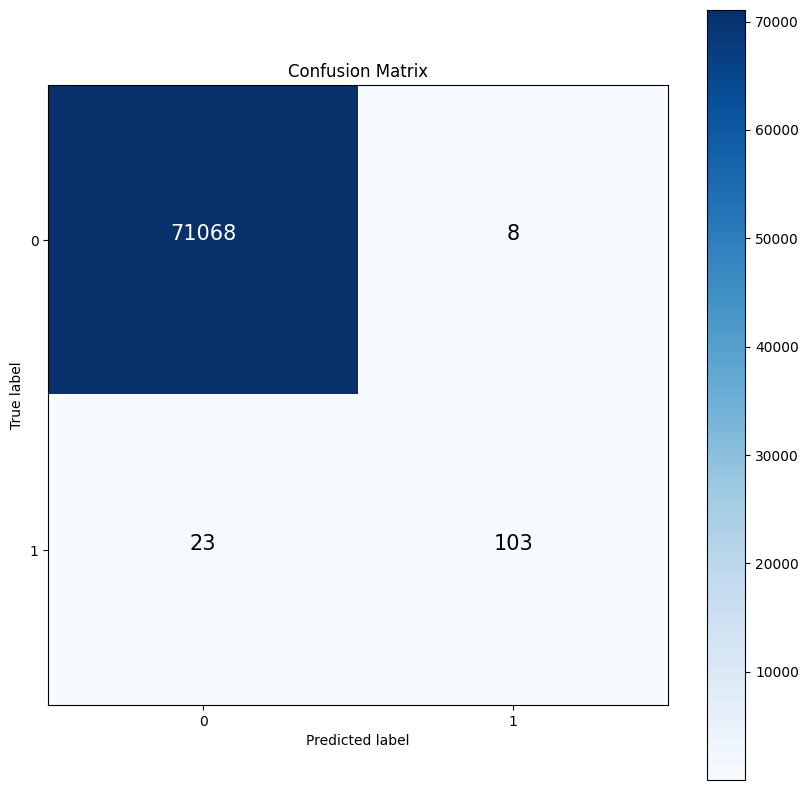

In [54]:
su.make_confusion_matrix(y_test, y_pred_bs_3)

Accuracy, recall and other metrics of the model

In [55]:
res3a = su.calculate_results(y_test, y_pred_bs_3)
res3a

{'accuracy': 99.95646189713771,
 'precision': np.float64(0.9995495038321099),
 'recall': np.float64(0.9995646189713772),
 'f1': np.float64(0.9995508640591892)}

3.b K Nearest Neighbor Classifier- after applying `SMOTE`

In [56]:
model_as_3 = KNeighborsClassifier(n_neighbors=3)
model_as_3.fit(X_train_smote, y_train_smote)
y_pred_as_3 = model_as_3.predict(X_test)
acc_as_3 = accuracy_score(y_test, y_pred_as_3)
acc_as_3

0.9986938569141316

confusion matrix 

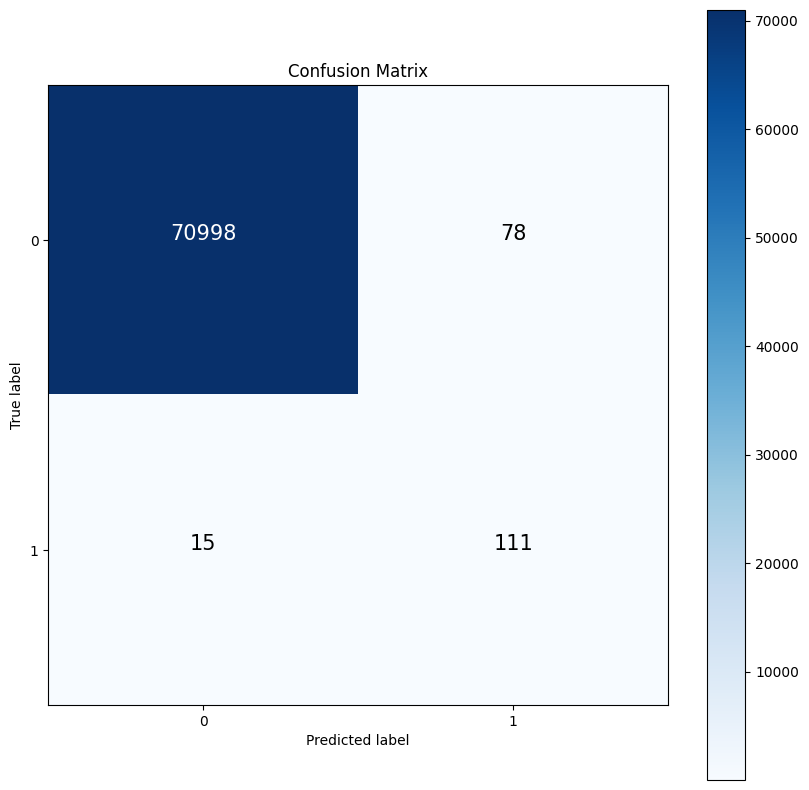

In [57]:
su.make_confusion_matrix(y_test, y_pred_as_3)

Accuracy, recall and other metrics of the model

In [58]:
res3b = su.calculate_results(y_test, y_pred_as_3)
res3b

{'accuracy': 99.86938569141316,
 'precision': np.float64(0.9990588282994496),
 'recall': np.float64(0.9986938569141316),
 'f1': np.float64(0.9988241816611957)}

4.a Random Forest Classifier - before applying `SMOTE`

In [59]:
model_bs_4 = RandomForestClassifier(max_depth=5, criterion='entropy')
model_bs_4.fit(X_train, y_train)
y_pred_bs_4 = model_bs_4.predict(X_test)
acc_bs_4 = accuracy_score(y_test, y_pred_bs_4)
acc_bs_4

0.9995084407741356

confusion matrix

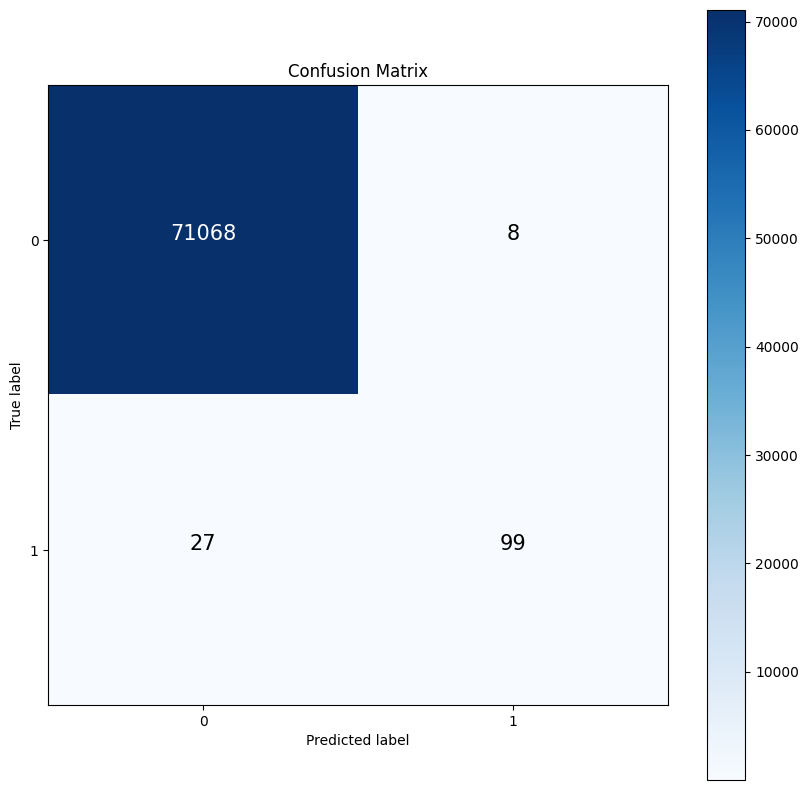

In [60]:
su.make_confusion_matrix(y_test, y_pred_bs_4)

Accuracy, recall and other metrics of the model

In [61]:
res4a = su.calculate_results(y_test, y_pred_bs_4)
res4a

{'accuracy': 99.95084407741356,
 'precision': np.float64(0.9994885909798832),
 'recall': np.float64(0.9995084407741356),
 'f1': np.float64(0.9994884315062261)}

4.b Random Forest Classifier - after applying `SMOTE`

In [62]:
model_as_4 = RandomForestClassifier(max_depth=5, criterion='entropy')
model_as_4.fit(X_train_smote, y_train_smote)
y_pred_as_4 = model_as_4.predict(X_test)
acc_as_4 = accuracy_score(y_test, y_pred_as_4)
acc_as_4

0.9968961546023988

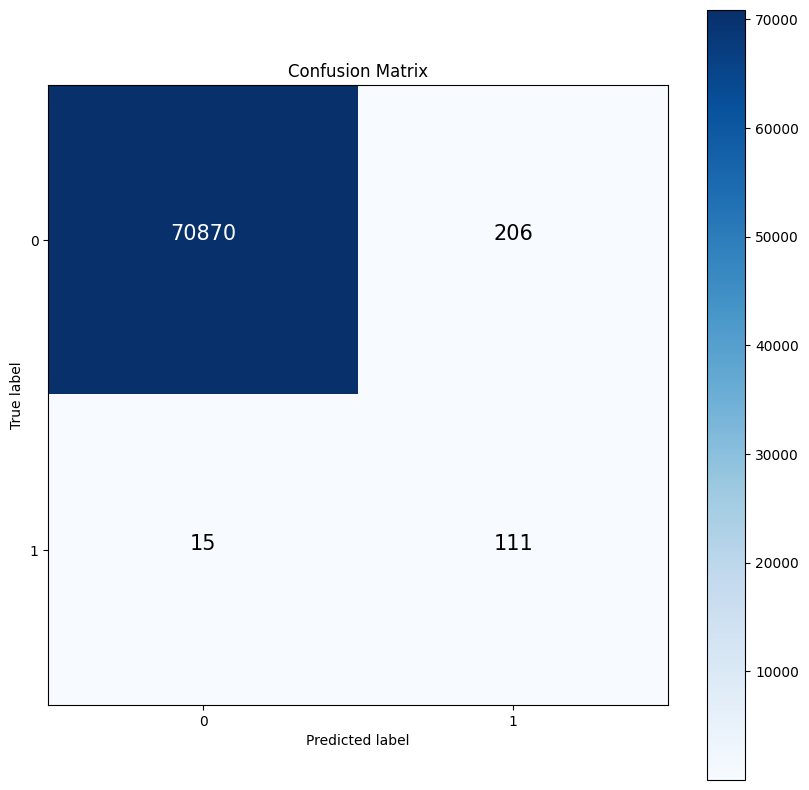

In [63]:
su.make_confusion_matrix(y_test, y_pred_as_4)

In [64]:
res4b = su.calculate_results(y_test, y_pred_as_4)
res4b

{'accuracy': 99.68961546023988,
 'precision': np.float64(0.9986387946439604),
 'recall': np.float64(0.9968961546023988),
 'f1': np.float64(0.9975631799819629)}

COMPARISON OF ALL MODELS

In [66]:
dp = pd.DataFrame([res1a,res1b,res2a,res2b,res3a,res3b,res4a,res4b],index=['1.1','1.2','2.1','2.2','3.1','3.2','4.1','4.2'])
dp

,accuracy,precision,recall,f1
1.1,99.905902,0.998972,0.999059,0.998962
1.2,97.613831,0.998155,0.976138,0.986365
2.1,99.943822,0.999418,0.999438,0.999424
2.2,96.716384,0.998154,0.967164,0.981699
3.1,99.956462,0.999550,0.999565,0.999551
3.2,99.869386,0.999059,0.998694,0.998824
4.1,99.950844,0.999489,0.999508,0.999488
4.2,99.689615,0.998639,0.996896,0.997563
